In [18]:
import pandas as pd

no3 = pd.read_csv("C:/Users/Usuario/DB/Hack_csv/no3_full.csv")
po4 = pd.read_csv("C:/Users/Usuario/DB/Hack_csv/po4_full.csv")
si  = pd.read_csv("C:/Users/Usuario/DB/Hack_csv/si_full.csv")

# Estandarizar nombres
for df in [no3, po4, si]:
    df.rename(columns={
        'latitude': 'lat',
        'longitude': 'lon'
    }, inplace=True)

# Mantener solo superficie
cols = ['time','depth','lat','lon']
no3 = no3[cols + ['no3']]
po4 = po4[cols + ['po4']]
si  = si [cols + ['si']]

# Merge secuencial
merged = no3.merge(po4, on=cols, how='inner')
merged = merged.merge(si,  on=cols, how='inner')

print("Base final nutrientes:", merged.shape)
nut = merged.copy()
nut.head()

Base final nutrientes: (4522, 7)


,time,depth,lat,lon,no3,po4,si
0,2024-02-01,0.494025,28.0,-115.25,0.279488,0.560324,3.070475
1,2024-02-01,0.494025,28.0,-115.00,0.274639,0.555834,2.971884
2,2024-02-01,0.494025,28.0,-114.75,0.113935,0.542683,2.754522
3,2024-02-01,0.494025,28.0,-114.50,0.095979,0.557995,2.735527
4,2024-02-01,0.494025,28.0,-114.25,0.033540,0.558439,2.672907


In [19]:
chl = pd.read_csv("C:/Users/Usuario/DB/Hack_csv/chlorophyll_gc_monthly_pixels (1) (1).csv")

chl = chl.rename(columns={'time':'date'})
chl['date'] = pd.to_datetime(chl['date'])

chl.dropna(subset=['chlor_a'], inplace=True)

clor = chl.copy()
clor.head()

,date,lat,lon,chlor_a
595,2024-06-01,31.729164,-114.770830,3.638275
596,2024-06-01,31.729164,-114.729164,4.231940
597,2024-06-01,31.729164,-114.687500,4.120379
598,2024-06-01,31.729164,-114.645830,3.585763
599,2024-06-01,31.729164,-114.604164,3.597894


In [20]:
import pandas as pd

thetao = pd.read_csv("C:/Users/Usuario/DB/Hack_csv/thetao_full.csv")

thetao = thetao.rename(columns={
    'latitude': 'lat',
    'longitude': 'lon'
})

thetao['time'] = pd.to_datetime(thetao['time'])

thetao = thetao[['time','depth','lat','lon','thetao']]

temp = thetao.copy()
temp.head()

,time,depth,lat,lon,thetao
0,2024-02-01,0.494025,27.916666,-115.333330,17.453094
1,2024-02-01,0.494025,27.916666,-115.250000,17.402447
2,2024-02-01,0.494025,27.916666,-115.166664,17.425081
3,2024-02-01,0.494025,27.916666,-115.083330,17.458990
4,2024-02-01,0.494025,27.916666,-115.000000,17.495415


In [21]:
type(nut)

pandas.core.frame.DataFrame

In [22]:
import os

base_path = r"C:/Users/Usuario/DB/datos_sat"
os.makedirs(base_path, exist_ok=True)

nut.to_csv(f"{base_path}/nutrientes_base.csv", index=False)
temp.to_csv(f"{base_path}/temperatura_base.csv", index=False)
clor.to_csv(f"{base_path}/clorofila_base.csv", index=False)

In [23]:
import matplotlib.pyplot as plt
import scipy.stats as stats

In [24]:
def normality_check(df, var, name=""):
    data = df[var].dropna()

    print(f"\n==============================")
    print(f"Dataset: {name}")
    print(f"Variable: {var}")
    print(f"N = {len(data)}")

    # Histograma
    plt.figure()
    plt.hist(data, bins=40)
    plt.title(f"{name} – Histogram ({var})")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()

    # Q-Q plot
    plt.figure()
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"{name} – Q-Q plot ({var})")
    plt.show()

    # Tests
    if len(data) > 5000:
        data_test = data.sample(5000, random_state=42)
        stat, p = stats.shapiro(data_test)
        print(f"Shapiro-Wilk (subsample): W={stat:.3f}, p={p:.3e}")
    else:
        stat, p = stats.shapiro(data)
        print(f"Shapiro-Wilk: W={stat:.3f}, p={p:.3e}")

    stat, p = stats.normaltest(data)
    print(f"D’Agostino-Pearson: K2={stat:.3f}, p={p:.3e}")

    if p < 0.05:
        print("❌ No normal")
    else:
        print("✅ Compatible con normalidad")


Dataset: Nutrients
Variable: no3
N = 1526


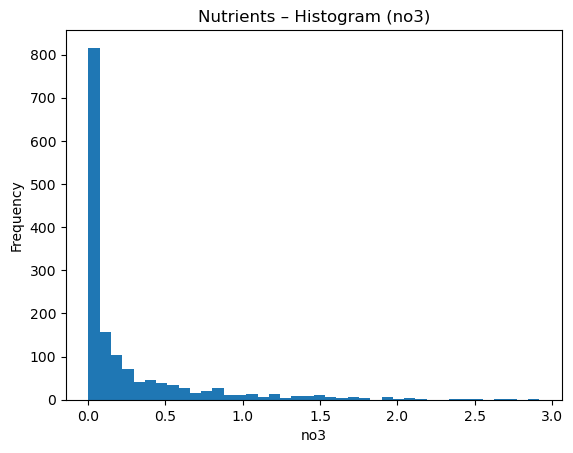

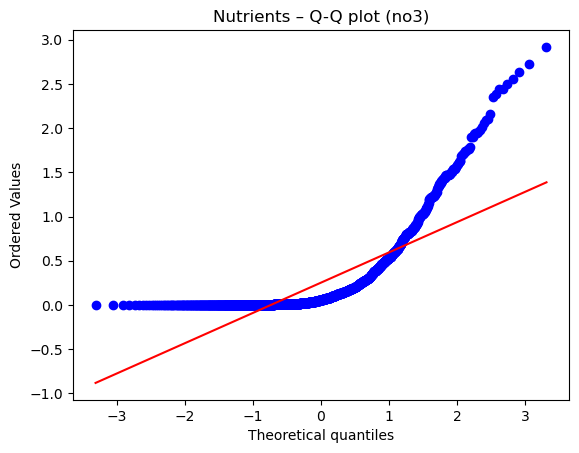

Shapiro-Wilk: W=0.637, p=6.483e-49
D’Agostino-Pearson: K2=838.042, p=1.051e-182
❌ No normal

Dataset: Nutrients
Variable: po4
N = 1526


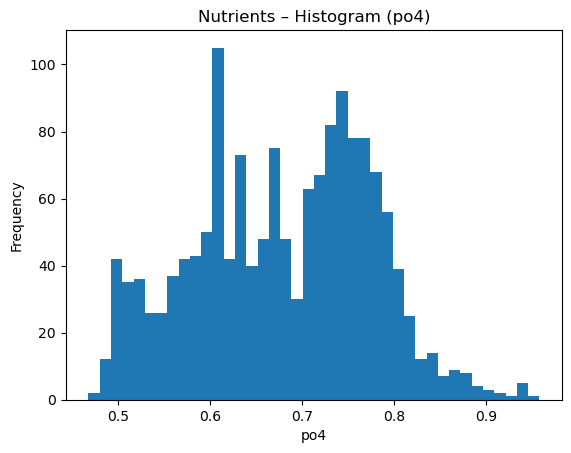

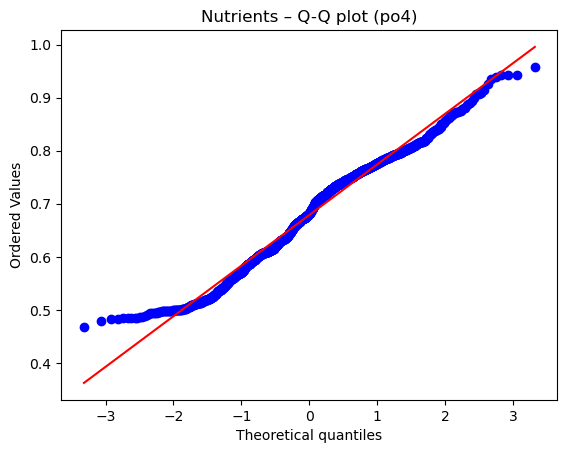

Shapiro-Wilk: W=0.981, p=1.901e-13
D’Agostino-Pearson: K2=80.150, p=3.942e-18
❌ No normal

Dataset: Nutrients
Variable: si
N = 1526


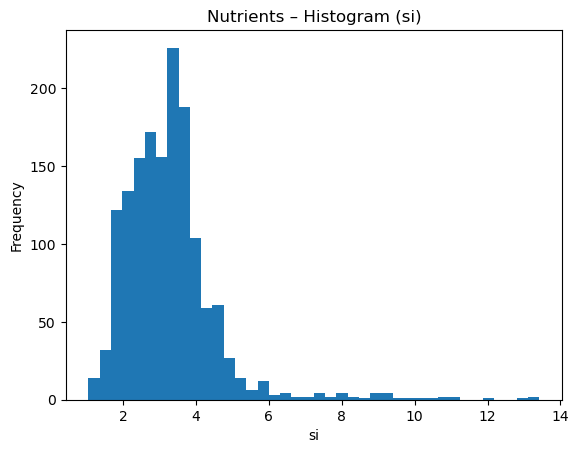

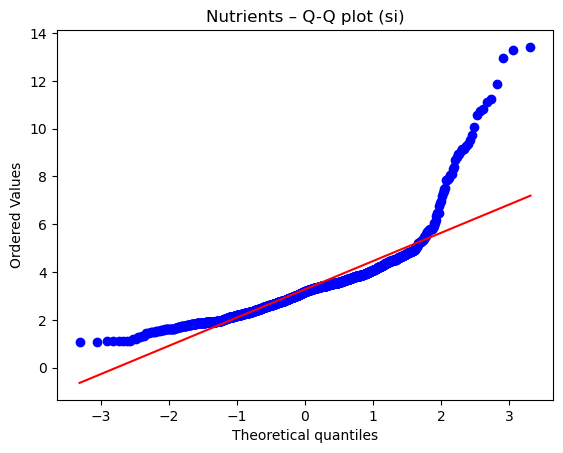

Shapiro-Wilk: W=0.796, p=4.044e-40
D’Agostino-Pearson: K2=964.126, p=4.393e-210
❌ No normal


In [25]:
normality_check(nut, 'no3',  name="Nutrients")
normality_check(nut, 'po4',  name="Nutrients")
normality_check(nut, 'si',   name="Nutrients")


Dataset: Temperature
Variable: thetao
N = 14770


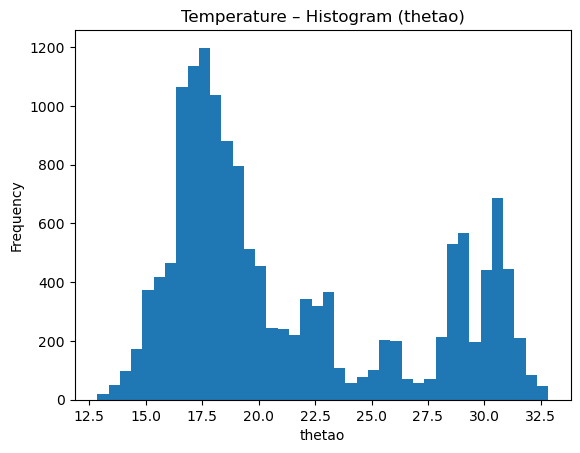

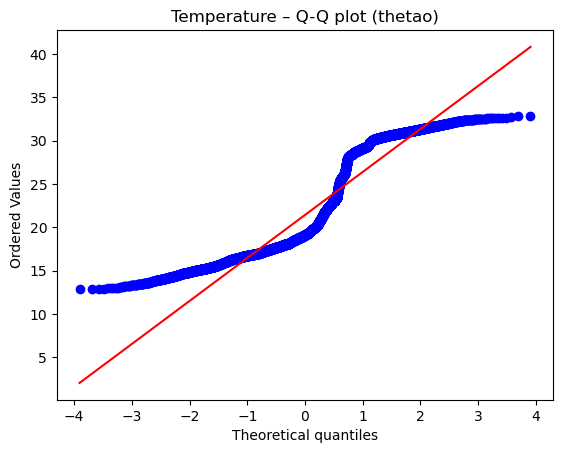

Shapiro-Wilk (subsample): W=0.871, p=1.425e-53
D’Agostino-Pearson: K2=4265.749, p=0.000e+00
❌ No normal


In [26]:
normality_check(temp, 'thetao', name="Temperature")


Dataset: Chlorophyll
Variable: chlor_a
N = 40053


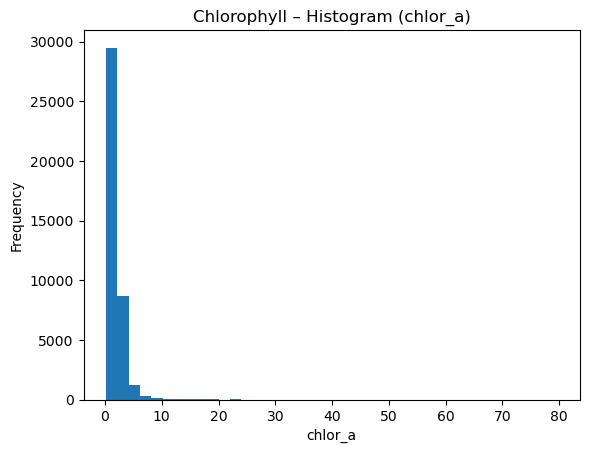

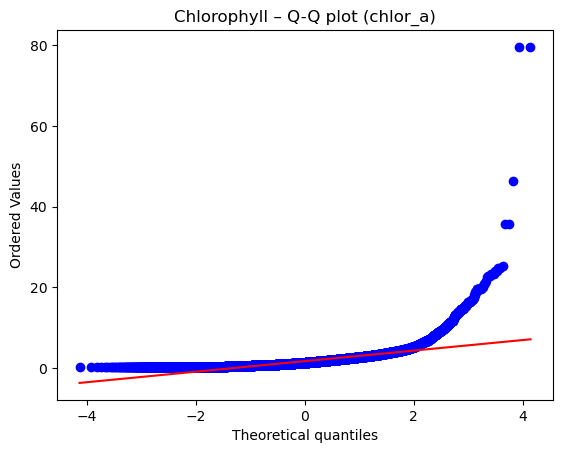

Shapiro-Wilk (subsample): W=0.698, p=1.353e-69
D’Agostino-Pearson: K2=62377.690, p=0.000e+00
❌ No normal


In [27]:
normality_check(clor, 'chlor_a', name="Chlorophyll")

In [28]:
import numpy as np
import pandas as pd

def assign_season(df, time_col='time'):
    df = df.copy()
    df[time_col] = pd.to_datetime(df[time_col])

    df['month'] = df[time_col].dt.month

    df['season'] = np.where(
        df['month'].isin([11, 12, 1, 2, 3, 4]),
        'Upwelling',
        'No-upwelling'
    )

    return df

In [29]:
nut = assign_season(nut, time_col='time')
nut[['time','month','season']].head()

,time,month,season
0,2024-02-01,2,Upwelling
1,2024-02-01,2,Upwelling
2,2024-02-01,2,Upwelling
3,2024-02-01,2,Upwelling
4,2024-02-01,2,Upwelling


In [30]:
temp = assign_season(temp, time_col='time')
temp[['time','month','season']].head()

,time,month,season
0,2024-02-01,2,Upwelling
1,2024-02-01,2,Upwelling
2,2024-02-01,2,Upwelling
3,2024-02-01,2,Upwelling
4,2024-02-01,2,Upwelling


In [31]:
clor = assign_season(clor, time_col='date')
clor[['date','month','season']].head()

,date,month,season
595,2024-06-01,6,No-upwelling
596,2024-06-01,6,No-upwelling
597,2024-06-01,6,No-upwelling
598,2024-06-01,6,No-upwelling
599,2024-06-01,6,No-upwelling


<Figure size 640x480 with 0 Axes>

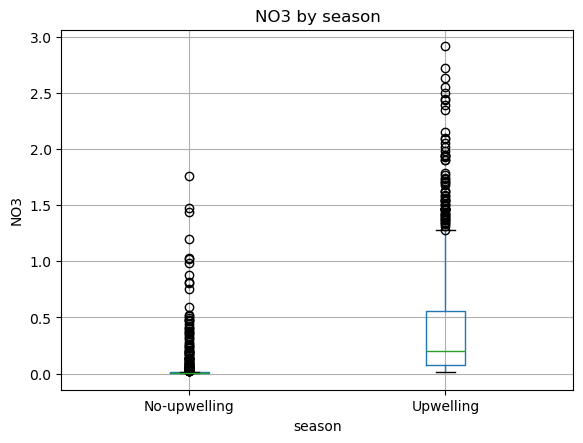

In [32]:
import matplotlib.pyplot as plt

plt.figure()
nut.boxplot(column='no3', by='season')
plt.title("NO3 by season")
plt.suptitle("")  # quita título automático
plt.ylabel("NO3")
plt.show()

<Figure size 640x480 with 0 Axes>

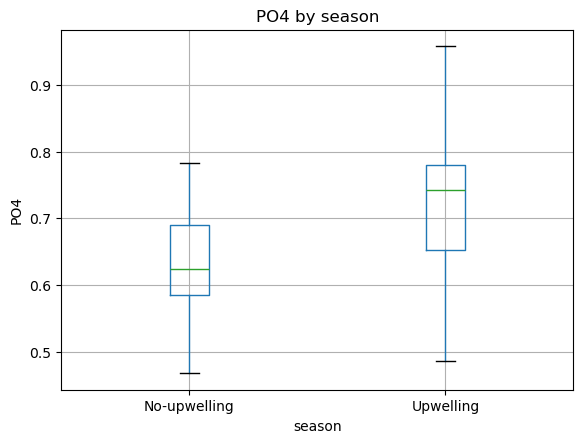

<Figure size 640x480 with 0 Axes>

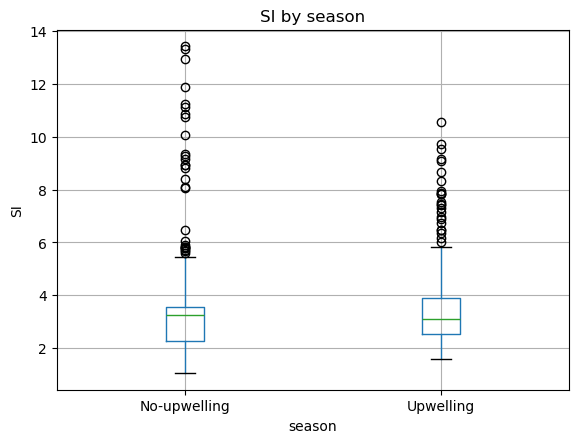

In [33]:
for var in ['po4','si']:
    plt.figure()
    nut.boxplot(column=var, by='season')
    plt.title(f"{var.upper()} by season")
    plt.suptitle("")
    plt.ylabel(var.upper())
    plt.show()

<Figure size 640x480 with 0 Axes>

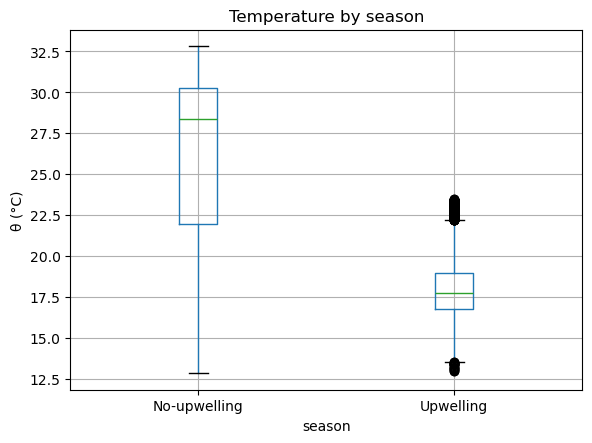

In [34]:
plt.figure()
temp.boxplot(column='thetao', by='season')
plt.title("Temperature by season")
plt.suptitle("")
plt.ylabel("θ (°C)")
plt.show()

<Figure size 640x480 with 0 Axes>

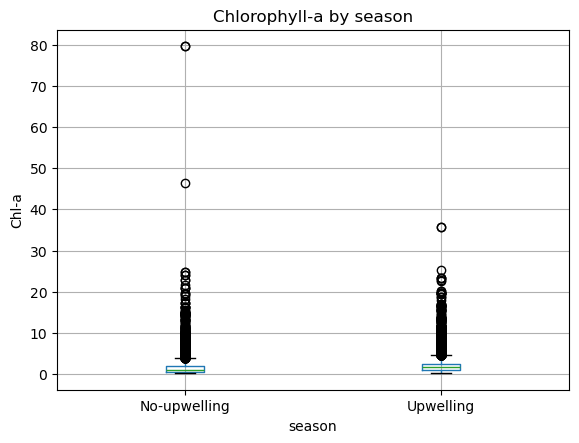

In [35]:
plt.figure()
clor.boxplot(column='chlor_a', by='season')
plt.title("Chlorophyll-a by season")
plt.suptitle("")
plt.ylabel("Chl-a")
plt.show()

In [ ]:
#Data were grouped into upwelling (November–April) and non-upwelling (May–October) seasons, and seasonal differences were explored using boxplots